## Stock prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['font.size'] = 10
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action = 'ignore')

In [6]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 10.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=7a67bb41236188d573a6b7c4ca95ce217727be58ead7a486060c170c26b59cf0
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [5]:
import yfinance as yf
from datetime import datetime
from fbprophet import Prophet
import pandas_datareader as pdr

### Retrieving data

In [8]:
start = datetime(2015, 1, 1)
end = datetime(2021, 6, 30)
qqq = yf.download('QQQ', start = start, end = end)
qqq

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,103.760002,104.199997,102.440002,102.940002,97.436562,31314600
2015-01-05,102.489998,102.610001,101.139999,101.430000,96.007301,36521300
2015-01-06,101.580002,101.750000,99.620003,100.070000,94.720009,66205500
2015-01-07,100.730003,101.599998,100.489998,101.360001,95.941048,37577400
2015-01-08,102.220001,103.500000,102.110001,103.300003,97.777336,40212600
...,...,...,...,...,...,...
2021-06-23,347.510010,348.920013,346.880005,347.739990,347.739990,27188500
2021-06-24,349.730011,351.459991,349.170013,349.890015,349.890015,32581600
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800


#### Samsung Electronics

In [10]:
sse = yf.download('005930.KS', start = start)
sse

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26800.0,26800.0,26540.0,26600.0,22645.328125,8774950
2015-01-05,26720.0,26720.0,26260.0,26660.0,22696.412109,10139500
2015-01-06,26300.0,26340.0,25760.0,25900.0,22049.398438,15235500
2015-01-07,25880.0,26220.0,25640.0,26140.0,22253.716797,14322750
2015-01-08,26780.0,26780.0,26200.0,26280.0,22372.902344,14477600
...,...,...,...,...,...,...
2021-06-28,81700.0,82000.0,81600.0,81900.0,81900.000000,11578529
2021-06-29,81900.0,82100.0,80800.0,81000.0,81000.000000,15744317
2021-06-30,81100.0,81400.0,80700.0,80700.0,80700.000000,13288643


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


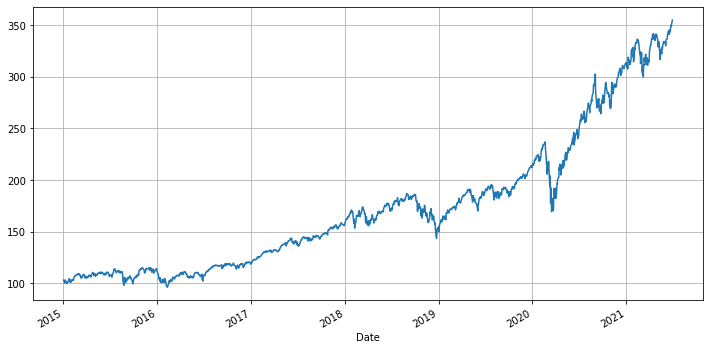

In [11]:
qqq.Close.plot(figsize = (12, 6), grid = True)
plt.show()

### Prophet

In [13]:
start = datetime(2016, 1, 1)
end = datetime(2021, 7, 1)
qqq = yf.download('QQQ', start = start, end = end)
qqq

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,109.449997,109.599998,108.120003,109.500000,104.695267,50807600
2016-01-05,110.040001,110.180000,108.800003,109.309998,104.513603,38795200
2016-01-06,107.410004,108.889999,107.410004,108.260002,103.509689,41891100
2016-01-07,105.949997,107.290001,104.809998,104.870003,100.268433,61386300
2016-01-08,105.629997,106.290001,103.900002,104.010002,99.446175,69344000
...,...,...,...,...,...,...
2021-06-24,349.730011,351.459991,349.170013,349.890015,349.890015,32581600
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800
2021-06-28,350.779999,353.850006,350.720001,353.709991,353.709991,39130300


In [16]:
df = pd.DataFrame({
    'ds' : qqq.index,
    'y' : qqq.Close
})
df

,ds,y
Date,,
2016-01-04,2016-01-04,109.500000
2016-01-05,2016-01-05,109.309998
2016-01-06,2016-01-06,108.260002
2016-01-07,2016-01-07,104.870003
2016-01-08,2016-01-08,104.010002
...,...,...
2021-06-24,2021-06-24,349.890015
2021-06-25,2021-06-25,349.459991
2021-06-28,2021-06-28,353.709991


In [17]:
df.reset_index(inplace = True)
del df['Date']
df

,ds,y
0,2016-01-04,109.500000
1,2016-01-05,109.309998
2,2016-01-06,108.260002
3,2016-01-07,104.870003
4,2016-01-08,104.010002
...,...,...
1378,2021-06-24,349.890015
1379,2021-06-25,349.459991
1380,2021-06-28,353.709991
1381,2021-06-29,354.989990


In [18]:
model = Prophet(daily_seasonality = True)
model.fit(df)

In [20]:
future = model.make_future_dataframe(184)
future

,ds
0,2016-01-04
1,2016-01-05
2,2016-01-06
3,2016-01-07
4,2016-01-08
...,...
1562,2021-12-27
1563,2021-12-28
1564,2021-12-29
1565,2021-12-30


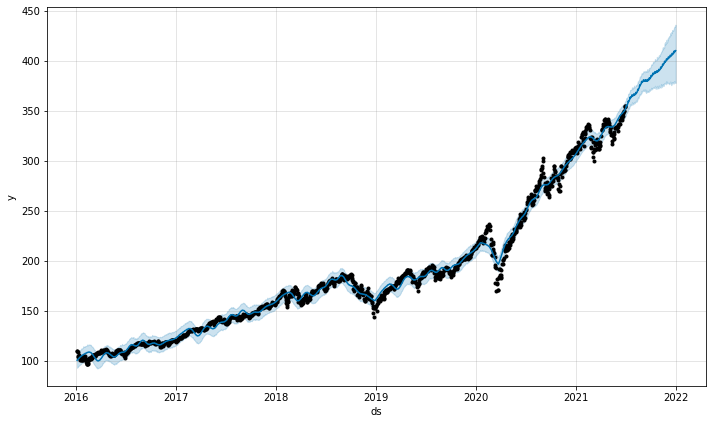

In [24]:
forecast = model.predict(future)
model.plot(forecast);

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,105.883026,92.808908,107.264791,105.883026,105.883026,-5.569281,-5.569281,-5.569281,-7.975202,-7.975202,-7.975202,-0.538562,-0.538562,-0.538562,2.944484,2.944484,2.944484,0.0,0.0,0.0,100.313745
1,2016-01-05,105.998610,93.515521,108.423950,105.998610,105.998610,-5.167531,-5.167531,-5.167531,-7.975202,-7.975202,-7.975202,-0.281367,-0.281367,-0.281367,3.089038,3.089038,3.089038,0.0,0.0,0.0,100.831079
2,2016-01-06,106.114193,93.503150,108.105146,106.114193,106.114193,-5.044657,-5.044657,-5.044657,-7.975202,-7.975202,-7.975202,-0.309228,-0.309228,-0.309228,3.239773,3.239773,3.239773,0.0,0.0,0.0,101.069536
3,2016-01-07,106.229777,93.661697,108.676568,106.229777,106.229777,-4.947170,-4.947170,-4.947170,-7.975202,-7.975202,-7.975202,-0.367550,-0.367550,-0.367550,3.395582,3.395582,3.395582,0.0,0.0,0.0,101.282606
4,2016-01-08,106.345360,94.612738,108.572666,106.345360,106.345360,-4.917032,-4.917032,-4.917032,-7.975202,-7.975202,-7.975202,-0.497094,-0.497094,-0.497094,3.555264,3.555264,3.555264,0.0,0.0,0.0,101.428328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2021-12-27,415.020882,378.098386,434.319586,385.177842,439.718054,-6.378533,-6.378533,-6.378533,-7.975202,-7.975202,-7.975202,-0.538562,-0.538562,-0.538562,2.135231,2.135231,2.135231,0.0,0.0,0.0,408.642348
1563,2021-12-28,415.304910,379.072435,434.737068,384.827140,440.254164,-6.045265,-6.045265,-6.045265,-7.975202,-7.975202,-7.975202,-0.281367,-0.281367,-0.281367,2.211304,2.211304,2.211304,0.0,0.0,0.0,409.259645
1564,2021-12-29,415.588939,378.752655,434.313202,384.901321,440.552567,-5.986841,-5.986841,-5.986841,-7.975202,-7.975202,-7.975202,-0.309228,-0.309228,-0.309228,2.297588,2.297588,2.297588,0.0,0.0,0.0,409.602097
1565,2021-12-30,415.872967,377.740460,436.244471,384.997817,441.004172,-5.948732,-5.948732,-5.948732,-7.975202,-7.975202,-7.975202,-0.367550,-0.367550,-0.367550,2.394020,2.394020,2.394020,0.0,0.0,0.0,409.924235


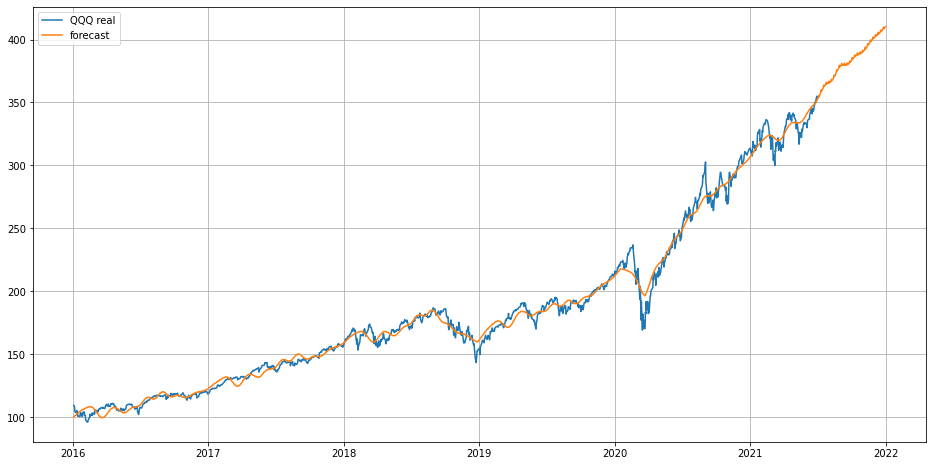

In [27]:
plt.figure(figsize = (16, 8))
plt.plot(qqq.index, qqq.Close, label = 'QQQ real')
plt.plot(forecast.ds, forecast.yhat, label = 'forecast')
plt.grid()
plt.legend()
plt.show()